In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Cross-Validation
----------------------------------------

<img src="figures/cross_validation.svg" width=100%>

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
from sklearn.cross_validation import cross_val_score
from sklearn.svm import LinearSVC

In [6]:
cross_val_score(LinearSVC(), X, y, cv=5)

array([ 1.        ,  1.        ,  0.93333333,  0.9       ,  1.        ])

In [7]:
cross_val_score(LinearSVC(), X, y, cv=5, scoring="f1_macro")

array([ 1.        ,  1.        ,  0.93333333,  0.89974937,  1.        ])

Let's go to a binary task for a moment

In [8]:
y % 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
cross_val_score(LinearSVC(), X, y % 2)

array([ 0.74509804,  0.76      ,  0.55102041])

In [10]:
cross_val_score(LinearSVC(), X, y % 2, scoring="average_precision")

array([ 0.65534102,  0.64920781,  0.31676038])

In [11]:
cross_val_score(LinearSVC(), X, y % 2, scoring="roc_auc")

array([ 0.75432526,  0.83957219,  0.53598485])

In [12]:
from sklearn.metrics.scorer import SCORERS
print(SCORERS.keys())

['f1', 'f1_weighted', 'f1_samples', 'recall_samples', 'recall_micro', 'adjusted_rand_score', 'recall_macro', 'mean_absolute_error', 'precision_macro', 'precision_weighted', 'f1_macro', 'recall_weighted', 'accuracy', 'precision_samples', 'median_absolute_error', 'precision', 'log_loss', 'precision_micro', 'average_precision', 'roc_auc', 'r2', 'recall', 'mean_squared_error', 'f1_micro']


Implementing your own scoring metric:

In [13]:
def my_accuracy_scoring(est, X, y):
    return np.mean(est.predict(X) == y)

cross_val_score(LinearSVC(), X, y, scoring=my_accuracy_scoring)

array([ 1.        ,  0.92156863,  0.97916667])

In [14]:
def my_super_scoring(est, X, y):
    return np.mean(est.predict(X) == y) - np.mean(est.coef_ != 0)

In [15]:
from sklearn.grid_search import GridSearchCV

y = iris.target
grid = GridSearchCV(LinearSVC(C=.01, dual=False),
                    param_grid={'penalty' : ['l1', 'l2']},
                    scoring=my_super_scoring)
grid.fit(X, y)
print(grid.best_params_)

{'penalty': 'l1'}


There are other ways to do cross-valiation

In [16]:
from sklearn.cross_validation import ShuffleSplit

shuffle_split = ShuffleSplit(len(X), 10, test_size=.4)
cross_val_score(LinearSVC(), X, y, cv=shuffle_split)

array([ 0.95      ,  0.91666667,  0.95      ,  0.98333333,  0.95      ,
        0.93333333,  0.96666667,  0.95      ,  0.98333333,  0.91666667])

In [17]:
from sklearn.cross_validation import StratifiedKFold, KFold, ShuffleSplit

def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
    plt.matshow(masks)

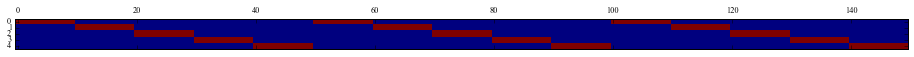

In [18]:
plot_cv(StratifiedKFold(y, n_folds=5), len(y))

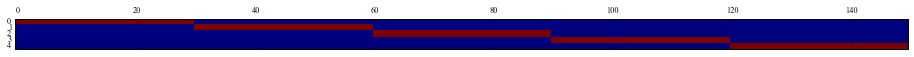

In [19]:
plot_cv(KFold(len(iris.target), n_folds=5), len(iris.target))

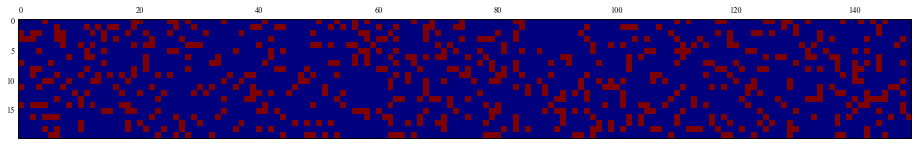

In [20]:
plot_cv(ShuffleSplit(len(iris.target), n_iter=20, test_size=.2), 
        len(iris.target))

# Exercises
Use  KFold cross validation and StratifiedKFold cross validation (3 or 5 folds) for LinearSVC on the iris dataset.
Why are the results so different? How could you get more similar results?

In [ ]:
# %load solutions/cross_validation_iris.py

In [55]:
kf = KFold(len(X), n_folds=5)
print( cross_val_score(LinearSVC(), X, y, cv=kf) )
print( cross_val_score(LinearSVC(), X, y, cv=KFold(len(X), n_folds=3)) )

[ 1.          1.          0.66666667  0.96666667  0.66666667]
[ 0.  0.  0.]


In [46]:
skf = StratifiedKFold(y, n_folds=5)
cross_val_score(LinearSVC(), X, y, cv=skf)

array([ 1.        ,  1.        ,  0.93333333,  0.9       ,  1.        ])

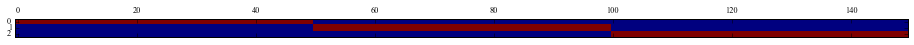

In [51]:
plot_cv(KFold(len(X), n_folds=3), len(y))

In [53]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])